<h1 align = 'center'>Some commented parts are used only on colab. And make sure about dataset directory</h1>

In [1]:
#import libraries
#!pip3 install keras==2.1.3
import numpy as np
import keras
#print(keras.__version__)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import time

plt.style.use('seaborn-whitegrid')


In [2]:
model = Sequential()

#input size is 32 by 32 and filter is grayscale,
#we want to get 32 filters so here 32 filters of size (3, 3) will be used which gives 32 filter maps
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 1), data_format = 'channels_last'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [3]:
"""
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth

from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
"""

    100% |████████████████████████████████| 993kB 11.2MB/s 


In [0]:
"""
train_link = 'https://drive.google.com/open?id=104DhX-7q-6gVxM6I7EB8C5XTF0YQ5njr'
fluff, id = train_link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train.csv') 

test_link = 'https://drive.google.com/open?id=1zZTF2b6p8aJoAaPGSrvd04Y5f-AP1VPD'
fluff, id = test_link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test.csv')
"""

In [3]:
def current_example(example_number, data_set):
    current_datafile = open(data_set + '.csv', 'r')
    current_dataset = current_datafile.readlines()
    current_datafile.close()
    
    inputs = np.zeros((len(example_number), 32, 32, 1))
    targets = np.zeros((len(example_number), 1))
    index = 0
    
    for each_number in example_number:
        each_set = current_dataset[each_number]
        all_values = each_set.split(',')

        #the first value is the label
        correct_label = int(all_values[0])

        #Normalize the pixel values in range of 0.01 - 1 
        inputs[index] = np.asarray(all_values[1:], dtype = np.float32).reshape(32, 32, 1) / 255 * 0.99 + 0.01 
        targets[index] = int(all_values[0])
        index += 1
            
    return(inputs, targets)


In [4]:
#prepare training and test data
np.random.seed(0)
num_exmp = np.linspace(0, 78199, 78200, dtype = np.int32)
np.random.shuffle(num_exmp)
(x_train, y_train) = current_example(num_exmp, 'train') 
y_train = keras.utils.to_categorical(y_train, num_classes=46)

num_exmp = np.linspace(0, 13799, 13800, dtype = np.int32)
x_test, y_test = current_example(num_exmp, 'test')
y_test = keras.utils.to_categorical(y_test, num_classes=46)


In [5]:

#Compile the model
sgd = SGD(lr=0.01, decay = 1e-6, momentum=0.9, nesterov=True)

model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ['accuracy'])


C:\Users\Sanket\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
#Evaluate the model, 
time1 = time.time()
tensorboard_callback = keras.callbacks.TensorBoard(log_dir = './cnn2', histogram_freq = 0, write_graph = True, write_images = True)
history = model.fit(x_train, y_train, batch_size=32, epochs = 100, validation_split = 0.2, shuffle = True, callbacks = [tensorboard_callback])
time2 = time.time()
score = model.evaluate(x_test, y_test, batch_size=32, verbose = 1)
time3 = time.time()
print("Train time = ", (time2 - time1)/60, "min", "\nTest time = ", (time3 - time2)/ 60, "min", "\n Test loss: ", score[0], " Test accuracy: ", score[1])

Epoch 1/100
1955/1955 [==============================] - 163s 83ms/step - loss: 1.2062 - accuracy: 0.6614 - val_loss: 0.2427 - val_accuracy: 0.9238
Epoch 2/100
1955/1955 [==============================] - 161s 82ms/step - loss: 0.3741 - accuracy: 0.8854 - val_loss: 0.1316 - val_accuracy: 0.9590
Epoch 3/100
1955/1955 [==============================] - 161s 82ms/step - loss: 0.2505 - accuracy: 0.9226 - val_loss: 0.1013 - val_accuracy: 0.9724
Epoch 4/100
1955/1955 [==============================] - 162s 83ms/step - loss: 0.1986 - accuracy: 0.9385 - val_loss: 0.0834 - val_accuracy: 0.9763
Epoch 5/100
1955/1955 [==============================] - 163s 83ms/step - loss: 0.1706 - accuracy: 0.9463 - val_loss: 0.0689 - val_accuracy: 0.9795
Epoch 6/100
1955/1955 [==============================] - 163s 83ms/step - loss: 0.1436 - accuracy: 0.9554 - val_loss: 0.0689 - val_accuracy: 0.9790
Epoch 7/100
1955/1955 [==============================] - 162s 83ms/step - loss: 0.1256 - accuracy: 0.9604 - val_

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


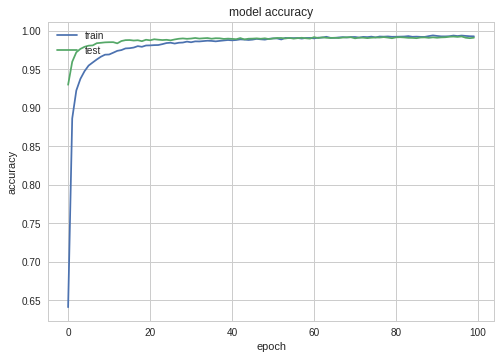

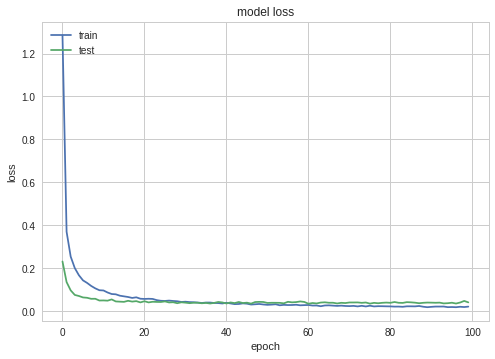

In [12]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#model.save('cnn2.hdf5')
model_json = model.to_json()

with open("cnn2.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("cnn2.h5")

In [0]:
"""
from google.colab import files
files.download("cnn2.h5")
files.download("cnn2.json")
"""

In [0]:

'''

# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()
'''

In [6]:
import cv2 

na = cv2.imread('ba.jpg', 0)

ret2,th2 = cv2.threshold(na,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

characters = '०, १, २, ३, ४, ५, ६, ७, ८, ९, क, ख, ग, घ, ङ, च, छ, ज, झ, ञ, ट, ठ, ड, ढ, ण, त, थ, द, ध,न, प,फ, ब, भ, म, य, र, ल, व, श, ष, स, ह, क्ष, त्र, ज्ञ'
characters = characters.split(',')

x = np.asarray(na, dtype = np.float32).reshape(1,32, 32,1) / 255 

predicted = np.argmax(model.predict(x))
devanagari_label = characters[predicted]

print('The predicted character is', devanagari_label, '.')
print('And actual image is ')

plt.imshow(th2)
plt.title('Predicted label: ' +  str(predicted))
plt.show()


ValueError: cannot reshape array of size 1 into shape (32,32,1)